In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
data = np.array([[3,1.5,1],[2,1,0],[1.5,0.5,0],[2.5,1,1]])
data

array([[3. , 1.5, 1. ],
       [2. , 1. , 0. ],
       [1.5, 0.5, 0. ],
       [2.5, 1. , 1. ]])

In [3]:
x1 = data[:,0]
x2 = data[:,1]
target = data[:,2]

In [6]:
target

array([1., 0., 0., 1.])

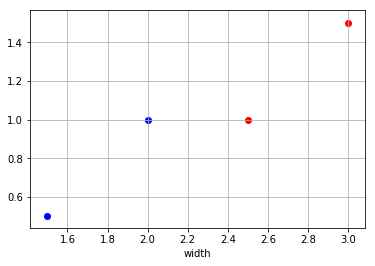

In [7]:
def vis_data():
    for i in range(len(x1)):
        if(target[i]==1):
            plt.scatter(x1[i], x2[i],c='r')
        else:
            plt.scatter(x1[i], x2[i],c='b')
    plt.xlabel("length")
    plt.xlabel("width")
    plt.grid()
    plt.show()

vis_data()

In [8]:
def NN(x1, x2, w1, w2, b):
    y_in = b + x1*w1 + x2*w2
    return y_in
def sigmoid(x):
    return 1/(1+np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))


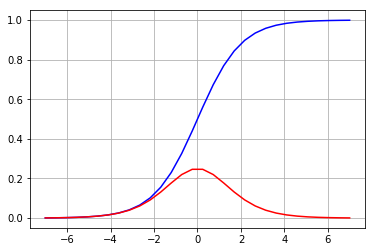

In [10]:
#test graph 
x_ = np.linspace(-7,7, 30)
plt.plot(x_, sigmoid(x_),c='b')
plt.plot(x_, d_sigmoid(x_), c='r')
plt.grid()
plt.show()

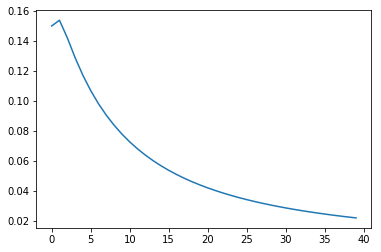

In [57]:
#Train
def train(x1, x2, target):
    w1 = np.random.randn()
    w2 = np.random.randn()
    b =np.random.randn()
    learning_rate = 0.1
    iteration = 4000
    costs=[]
    for i in range(iteration):
        for j in range(len(x1)):
            y_in = NN(x1[j],x2[j], w1, w2, b)
            y = sigmoid(y_in)
            #cost
            cost = (y-target[j])**2
            #print('cost: ', cost)
            #optimation
            
            d_cost = 2*(y-target[j])
            d_y = d_sigmoid(y_in)
            dz = d_cost * d_y
            w1 = w1-dz*learning_rate*x1[j]
            w2 = w2-dz*learning_rate*x2[j]
            b = b-dz*learning_rate*1
            #print('weight',w1, w2, b)
        if i%100 == 0:
            costs = np.append(costs, cost)
    x = np.arange(len(costs))
    plt.plot(x, costs)
            
    return w1, w2, b
w1, w2, b = train(x1, x2, target)



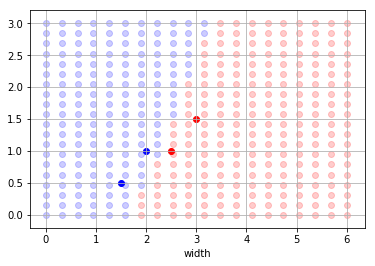

In [56]:
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
vis_data()
   